# Birthday Paradox Simulation

## Introduction

The **Birthday Paradox** (also known as the Birthday Problem) is a counterintuitive result in probability theory that demonstrates how quickly the probability of a shared birthday grows with group size.

## Theoretical Foundation

### Problem Statement

Given a group of $n$ randomly chosen people, what is the probability that at least two people share the same birthday?

### Assumptions

- There are 365 days in a year (ignoring leap years)
- Birthdays are uniformly distributed across all days
- Each person's birthday is independent of others

### Analytical Solution

It is easier to first calculate the probability that **no two people** share a birthday, then subtract from 1.

For $n$ people, the probability that all birthdays are distinct is:

$$P(\text{no match}) = \frac{365}{365} \cdot \frac{364}{365} \cdot \frac{363}{365} \cdots \frac{365-n+1}{365}$$

This can be written as:

$$P(\text{no match}) = \prod_{i=0}^{n-1} \frac{365-i}{365} = \frac{365!}{365^n (365-n)!}$$

Therefore, the probability of **at least one match** is:

$$P(\text{match}) = 1 - P(\text{no match}) = 1 - \prod_{i=0}^{n-1} \frac{365-i}{365}$$

### The Surprising Result

The paradox lies in the fact that:
- With just $n = 23$ people, $P(\text{match}) > 0.5$
- With $n = 50$ people, $P(\text{match}) \approx 0.97$
- With $n = 70$ people, $P(\text{match}) > 0.999$

This is counterintuitive because we naturally compare $n$ to 365, but the key insight is that we're counting **pairwise comparisons**, which grow as $\binom{n}{2} = \frac{n(n-1)}{2}$.

## Computational Implementation

We will:
1. Calculate the exact theoretical probability
2. Run Monte Carlo simulations to estimate the probability empirically
3. Compare theoretical and simulated results

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

# Set random seed for reproducibility
np.random.seed(42)

# Parameters
DAYS_IN_YEAR = 365
MAX_PEOPLE = 80
NUM_SIMULATIONS = 10000

In [2]:
def theoretical_probability(n, days=365):
    """
    Calculate the exact theoretical probability of at least one birthday match
    in a group of n people.
    
    Parameters
    ----------
    n : int
        Number of people in the group
    days : int
        Number of days in a year (default 365)
    
    Returns
    -------
    float
        Probability of at least one shared birthday
    """
    if n > days:
        return 1.0
    
    # Calculate P(no match) = product of (365-i)/365 for i in 0 to n-1
    p_no_match = 1.0
    for i in range(n):
        p_no_match *= (days - i) / days
    
    return 1 - p_no_match

In [3]:
def simulate_birthday_match(n, num_simulations=10000, days=365):
    """
    Run Monte Carlo simulation to estimate probability of birthday match.
    
    Parameters
    ----------
    n : int
        Number of people in the group
    num_simulations : int
        Number of simulation trials
    days : int
        Number of days in a year
    
    Returns
    -------
    float
        Estimated probability of at least one shared birthday
    """
    matches = 0
    
    for _ in range(num_simulations):
        # Generate random birthdays for n people
        birthdays = np.random.randint(0, days, size=n)
        
        # Check if there are any duplicates
        if len(birthdays) != len(set(birthdays)):
            matches += 1
    
    return matches / num_simulations

In [4]:
# Calculate probabilities for different group sizes
group_sizes = np.arange(1, MAX_PEOPLE + 1)

# Theoretical probabilities
theoretical_probs = np.array([theoretical_probability(n) for n in group_sizes])

# Simulated probabilities
print("Running Monte Carlo simulations...")
simulated_probs = np.array([simulate_birthday_match(n, NUM_SIMULATIONS) for n in group_sizes])
print("Simulations complete.")

Running Monte Carlo simulations...


Simulations complete.


In [5]:
# Find the crossover point (where P > 0.5)
crossover_n = np.argmax(theoretical_probs >= 0.5) + 1
crossover_p = theoretical_probs[crossover_n - 1]

print(f"Key Results:")
print(f"="*50)
print(f"Crossover point: n = {crossover_n} people")
print(f"P(match | n={crossover_n}) = {crossover_p:.4f}")
print(f"")
print(f"Selected probabilities:")
for n in [10, 20, 23, 30, 50, 70]:
    p_theo = theoretical_probs[n-1]
    p_sim = simulated_probs[n-1]
    print(f"  n = {n:2d}: P(theory) = {p_theo:.4f}, P(simulated) = {p_sim:.4f}")

Key Results:
Crossover point: n = 23 people
P(match | n=23) = 0.5073

Selected probabilities:
  n = 10: P(theory) = 0.1169, P(simulated) = 0.1204
  n = 20: P(theory) = 0.4114, P(simulated) = 0.4027
  n = 23: P(theory) = 0.5073, P(simulated) = 0.4968
  n = 30: P(theory) = 0.7063, P(simulated) = 0.7065
  n = 50: P(theory) = 0.9704, P(simulated) = 0.9689
  n = 70: P(theory) = 0.9992, P(simulated) = 0.9990


In [6]:
# Calculate number of pairwise comparisons
pairwise_comparisons = np.array([n * (n - 1) / 2 for n in group_sizes])

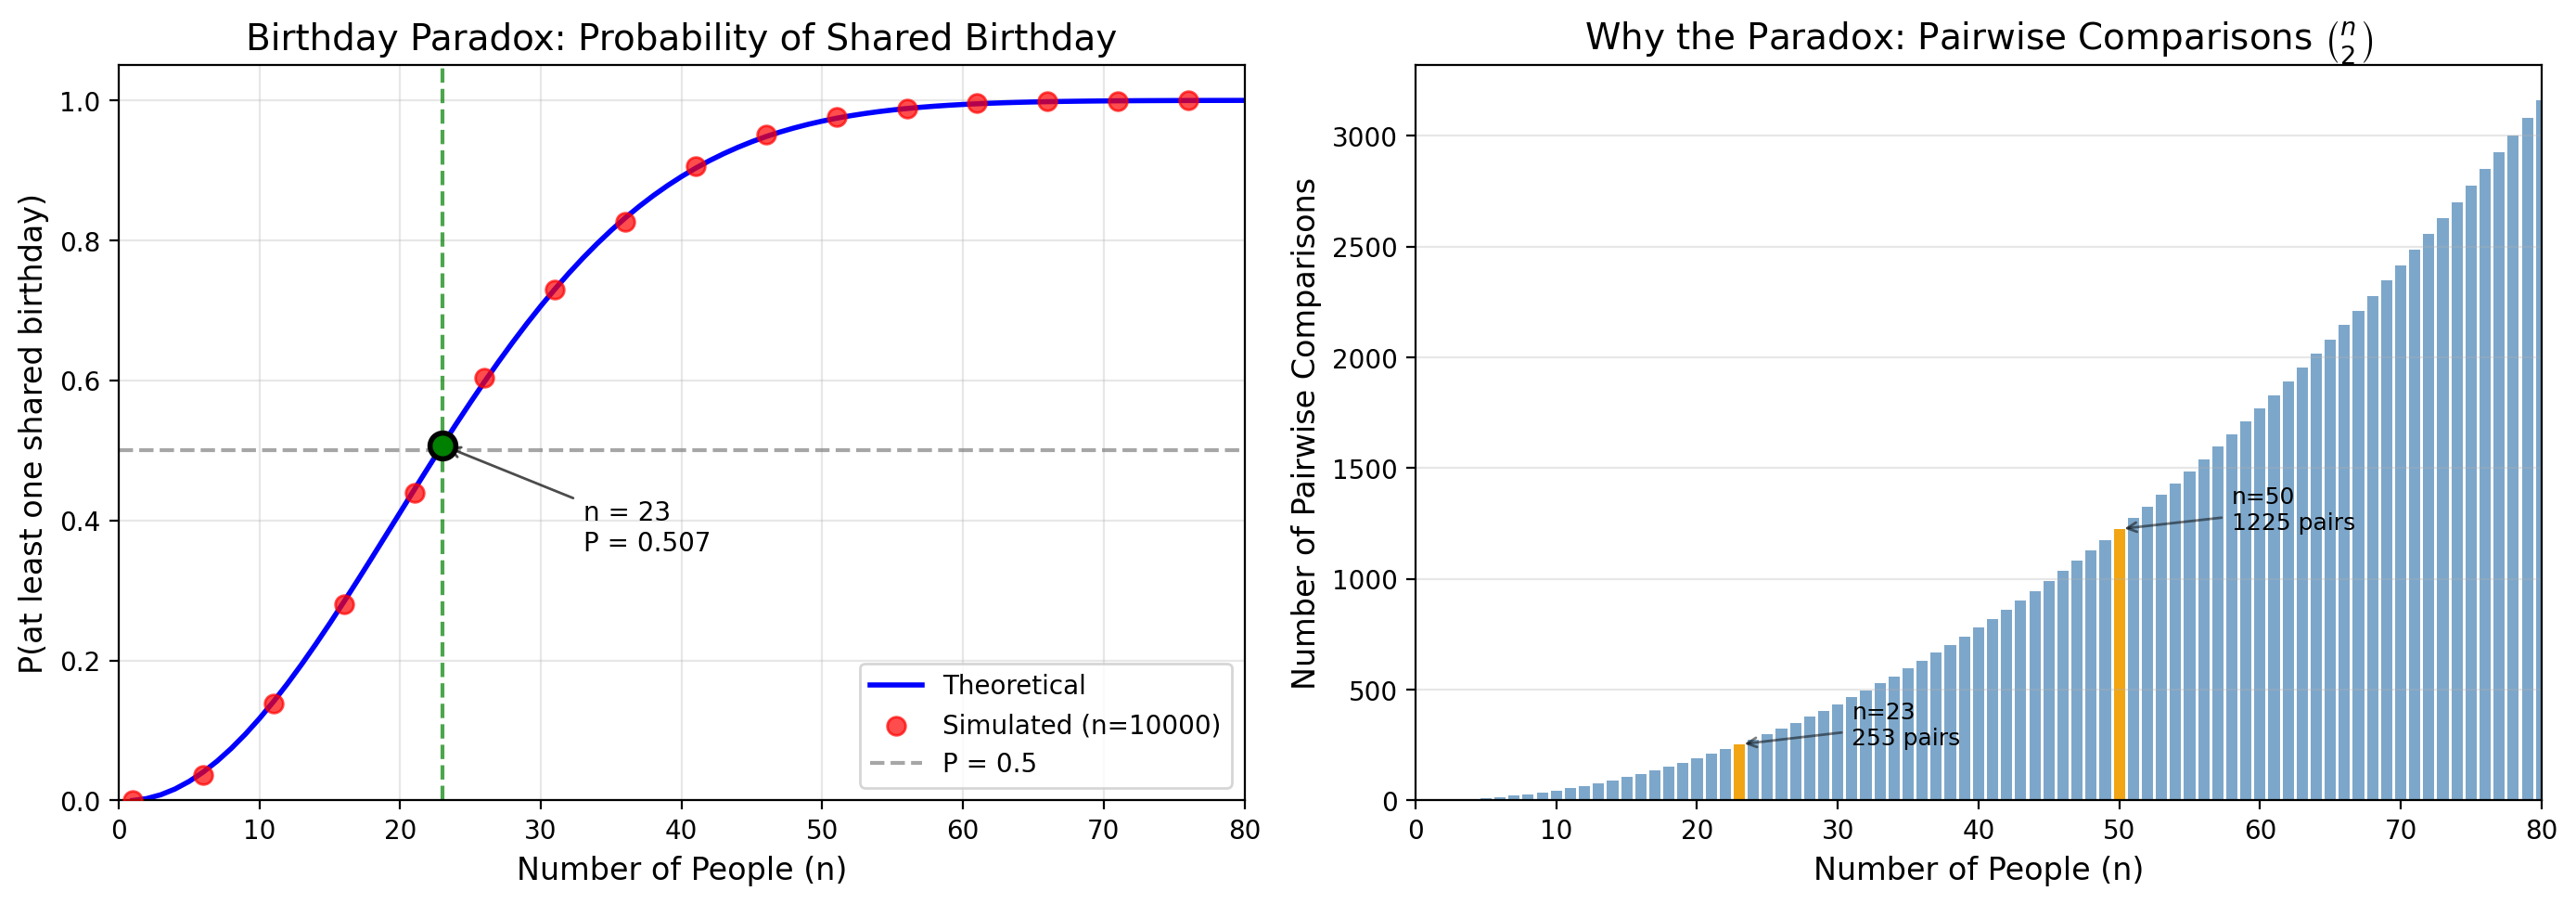


Plot saved to 'plot.png'


In [7]:
# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Probability vs Group Size
ax1 = axes[0]
ax1.plot(group_sizes, theoretical_probs, 'b-', linewidth=2, label='Theoretical')
ax1.scatter(group_sizes[::5], simulated_probs[::5], color='red', s=50, 
            alpha=0.7, label=f'Simulated (n={NUM_SIMULATIONS})', zorder=5)

# Mark the crossover point
ax1.axhline(y=0.5, color='gray', linestyle='--', alpha=0.7, label='P = 0.5')
ax1.axvline(x=crossover_n, color='green', linestyle='--', alpha=0.7)
ax1.scatter([crossover_n], [crossover_p], color='green', s=100, zorder=10, 
            edgecolors='black', linewidth=2)
ax1.annotate(f'n = {crossover_n}\nP = {crossover_p:.3f}', 
             xy=(crossover_n, crossover_p), 
             xytext=(crossover_n + 10, crossover_p - 0.15),
             fontsize=10, 
             arrowprops=dict(arrowstyle='->', color='black', alpha=0.7))

ax1.set_xlabel('Number of People (n)', fontsize=12)
ax1.set_ylabel('P(at least one shared birthday)', fontsize=12)
ax1.set_title('Birthday Paradox: Probability of Shared Birthday', fontsize=14)
ax1.legend(loc='lower right', fontsize=10)
ax1.grid(True, alpha=0.3)
ax1.set_xlim(0, MAX_PEOPLE)
ax1.set_ylim(0, 1.05)

# Plot 2: Understanding why - number of pairwise comparisons
ax2 = axes[1]
ax2.bar(group_sizes, pairwise_comparisons, color='steelblue', alpha=0.7, width=0.8)

# Highlight key points
for n in [23, 50]:
    pairs = n * (n - 1) / 2
    ax2.bar([n], [pairs], color='orange', alpha=0.9, width=0.8)
    ax2.annotate(f'n={n}\n{int(pairs)} pairs', 
                 xy=(n, pairs), 
                 xytext=(n + 8, pairs),
                 fontsize=9,
                 arrowprops=dict(arrowstyle='->', color='black', alpha=0.5))

ax2.set_xlabel('Number of People (n)', fontsize=12)
ax2.set_ylabel('Number of Pairwise Comparisons', fontsize=12)
ax2.set_title(r'Why the Paradox: Pairwise Comparisons $\binom{n}{2}$', fontsize=14)
ax2.grid(True, alpha=0.3, axis='y')
ax2.set_xlim(0, MAX_PEOPLE)

plt.tight_layout()
plt.savefig('birthday_paradox_simulation_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\nPlot saved to 'plot.png'")

## Analysis and Discussion

### Why is this Paradoxical?

The Birthday Paradox seems surprising because our intuition compares the number of people ($n$) directly to the number of possible birthdays (365). We instinctively think: "With only 23 people and 365 days, how can there be a 50% chance of overlap?"

However, the key insight is that we're not asking whether **a specific person** shares a birthday with someone else. We're asking whether **any pair** shares a birthday. The number of pairs grows quadratically:

$$\binom{n}{2} = \frac{n(n-1)}{2}$$

For $n = 23$: $\binom{23}{2} = 253$ pairs to compare!

### Approximation for Large $n$

For large groups, we can approximate using the Taylor expansion $e^x \approx 1 + x$:

$$P(\text{match}) \approx 1 - e^{-n(n-1)/(2 \cdot 365)}$$

### Applications

The Birthday Paradox has important applications in:

1. **Cryptography**: Birthday attacks on hash functions exploit this principle. A hash function with $n$-bit output can be broken in approximately $2^{n/2}$ operations, not $2^n$.

2. **Database Systems**: Estimating collision probabilities in hash tables and unique ID generation.

3. **Quality Control**: Detecting duplicates in datasets.

## Conclusion

Our simulation confirms the theoretical prediction with excellent agreement. The Birthday Paradox beautifully illustrates how combinatorial growth can lead to counterintuitive probability results, with practical implications across computer science and mathematics.